In [65]:
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 12.0)


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [130]:
dados = pd.read_csv('DADOS_2020.csv', header=None)

#### Tratamento dos dados 

In [131]:
dados = dados.iloc[:,0:10]

dias = []
horas = []
#print(dados[4][0])
for i in range(0, len(dados)):
    #Modelo: 2017-01-01 05:03 
    dias.append(("%d-%d-%d" %(dados[6][i], dados[5][i], 
                 dados[4][i])))
    horas.append(("%d-%d-%d %d:%d:%d" %(dados[6][i], dados[5][i], 
                 dados[4][i], dados[7][i], dados[8][i], dados[9][i])))
    
dados = dados.iloc[:, 0:4]
horario = pd.to_datetime(horas)
dados = dados.join(pd.DataFrame(horario), how='outer', rsuffix=' ')
dados.columns = ['Solução 1', 'Solução 2', 'Solução 3', 'Solução 4', 'Horario']
dados = dados.set_index('Horario')


In [149]:
def geraGrafico(nomeX, titulo, solucao, dadosmin, dadosmax, 
                limY_inf=0, limY_sup=2.5, minutos=1, cor='red'):
    solucao = solucao.iloc[range(dadosmin, dadosmax, minutos)] 
    plt.title(titulo, fontsize=14)
    plt.xlabel(nomeX, fontsize=14)
    plt.ylabel("Potential difference in Volts", fontsize=14)
    
    plt.ylim(limY_inf, limY_sup)
    plt.grid(True, linewidth=1)
    plt.gcf().autofmt_xdate()
    plt.plot(solucao, color=cor)

In [180]:
def FiltraPositivo(serie):
    for elemento in range(len(serie)):
        if(serie[elemento] > 0.00):
            serie[elemento] = -serie[elemento]

### Filtrando os dados

In [199]:
solucao1 = dados.iloc[:, 0].dropna()
solucao1 = solucao1[(solucao1 >= -1.1) & (solucao1 <= 0.0)] 

solucao2 = dados.iloc[:, 1].dropna()
solucao2 = solucao2[solucao2 >= -1.1] 

solucao3 = dados.iloc[:, 2].dropna()
solucao3 = solucao3[solucao3 >= -1.1] 

solucao4 = dados.iloc[:, 3].dropna()
solucao4 = solucao4[solucao4 >= -0.7] 


solucao1 = -0.9484 - solucao1
solucao2 = solucao2 + 0.2518
solucao3 = -0.9484 - solucao3
solucao4 = solucao4 + 0.2518

FiltraPositivo(solucao1)
FiltraPositivo(solucao2)
#FiltraPositivo(solucao3)
FiltraPositivo(solucao4)


-0.9464
-0.8482000000000001
-0.7154
-0.44819999999999993


### Dados não filtrados

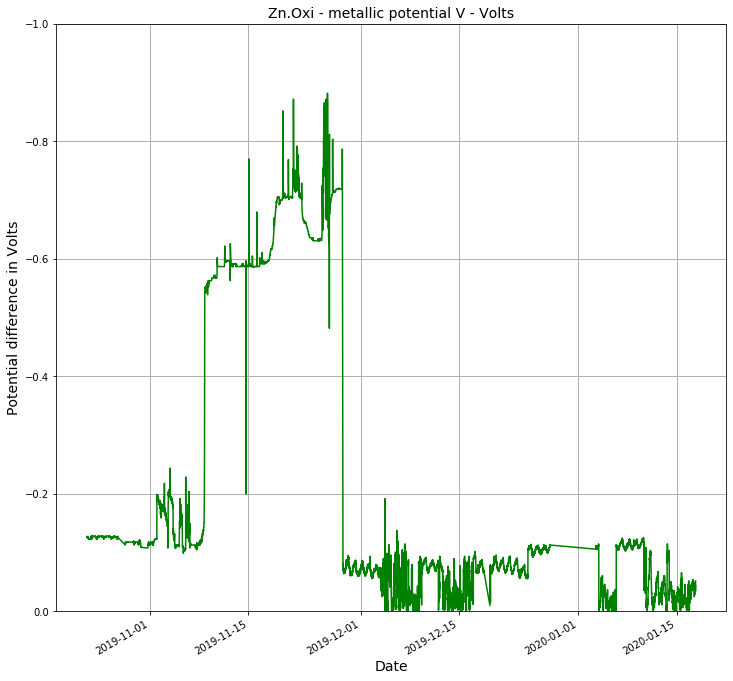

In [255]:
geraGrafico("Date", "Zn.Oxi - metallic potential V - Volts", solucao1, 7420, len(solucao1), 0, -1, 10, cor='green')

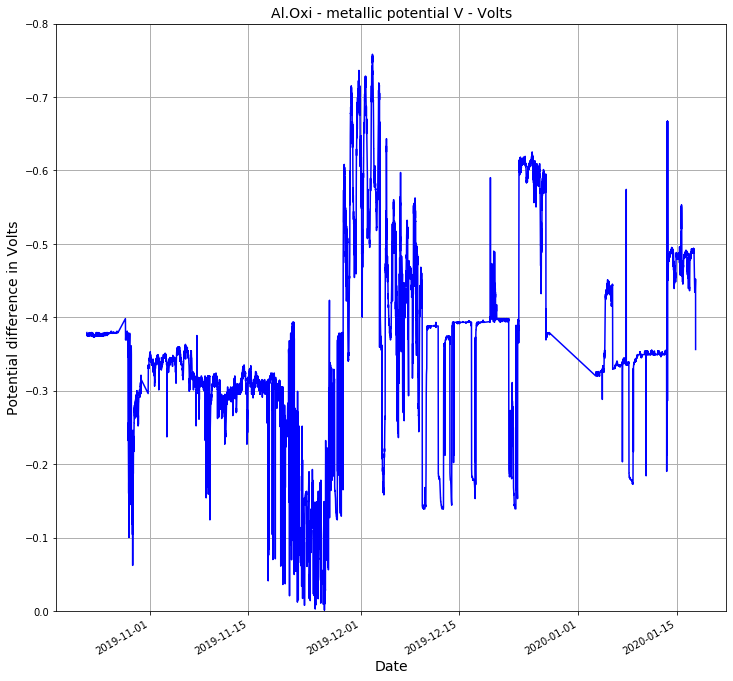

In [225]:
geraGrafico("Date", "Al.Oxi - metallic potential V - Volts",solucao2, 7420, len(solucao2),
            0, -0.8, 10, 'blue')

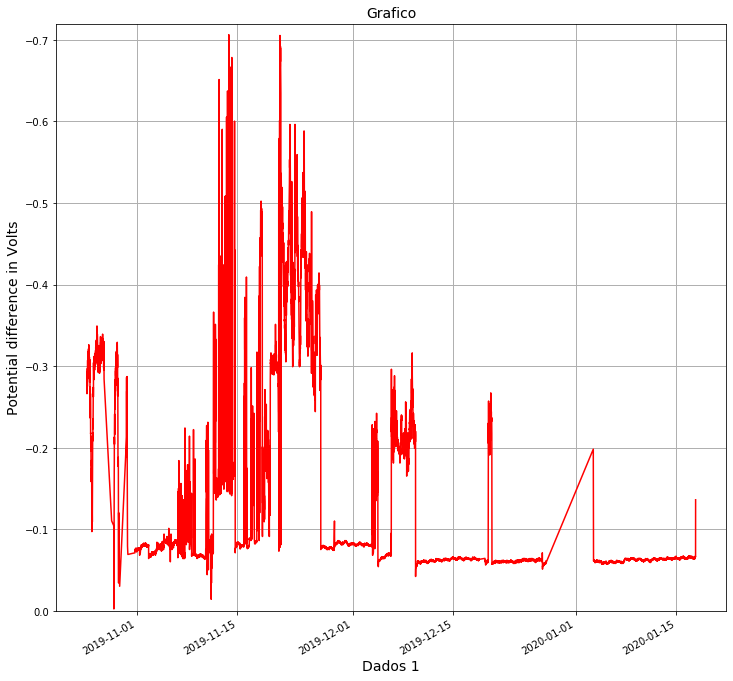

In [218]:
geraGrafico("Date", "Zn.sur - metallic potential V - Volts", solucao3, 7420, len(solucao3), 0, -0.72, 10, 'red')

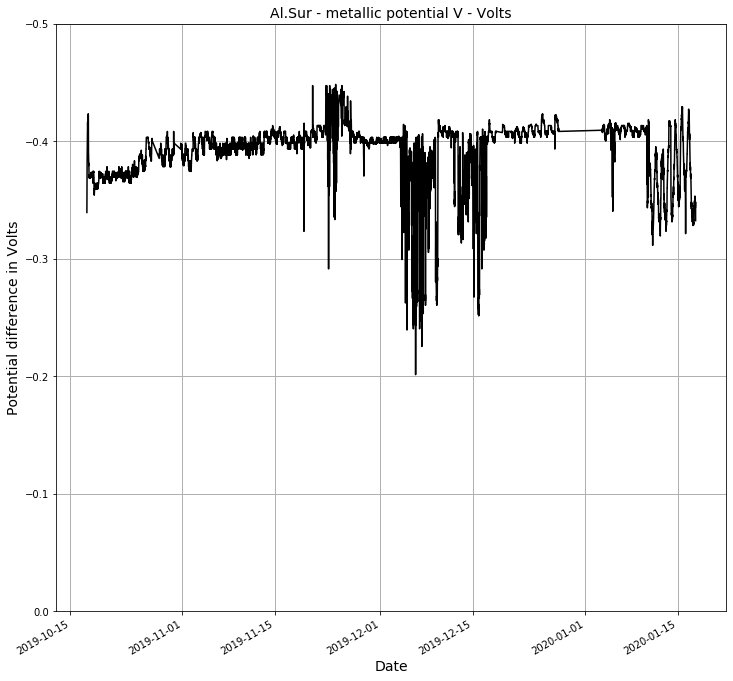

In [224]:
geraGrafico("Date", "Al.Sur - metallic potential V - Volts",solucao4, 0, len(solucao4), 0, -0.5, 10, 'black')

### Dados Filtrados

In [253]:
Solucao1Filtrada = solucao1.rolling(window=100).mean()
Solucao1Filtrada.count()

118406

In [283]:
Solucao2Filtrada = solucao2.rolling(window=100).mean()
print(Solucao2Filtrada.count())
Solucao2Filtrada = Solucao2Filtrada[Solucao2Filtrada > -0.62]

118448


In [285]:
Solucao3Filtrada = solucao3.rolling(window=100).mean()
print(Solucao3Filtrada.count())
Solucao3Filtrada = Solucao3Filtrada[Solucao3Filtrada > -0.35]

113194


In [286]:
Solucao4Filtrada = solucao4.rolling(window=100).mean()
Solucao4Filtrada.count()

116277

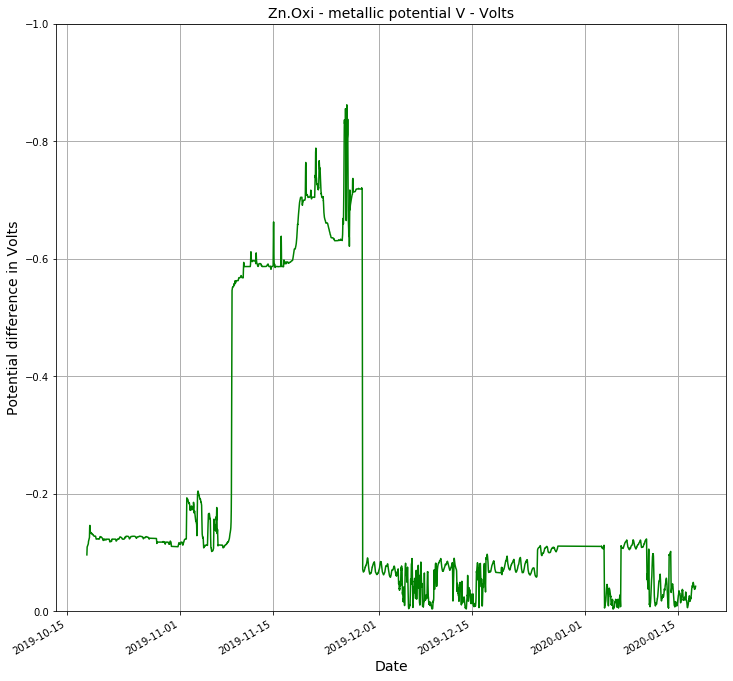

In [254]:
geraGrafico("Date", "Zn.Oxi - metallic potential V - Volts", Solucao1Filtrada, 700, len(Solucao1Filtrada), 0, -1, 10, cor='green')

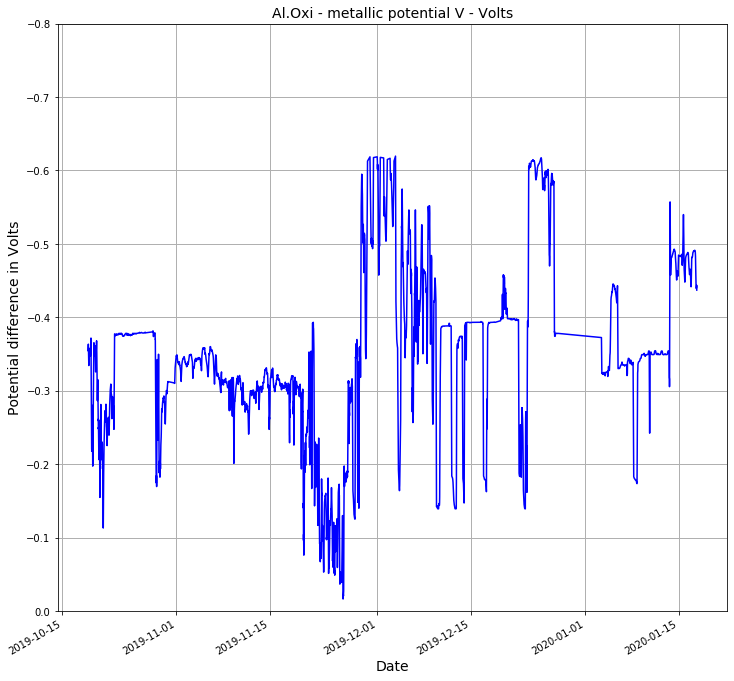

In [274]:
geraGrafico("Date", "Al.Oxi - metallic potential V - Volts",Solucao2Filtrada, 700, len(Solucao2Filtrada),
            0, -0.8, 10, 'blue')

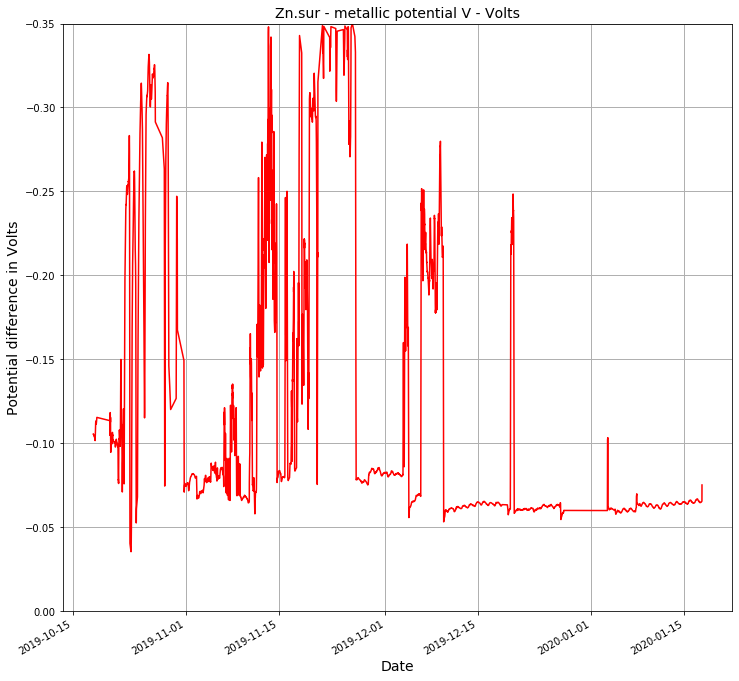

In [288]:
geraGrafico("Date", "Zn.sur - metallic potential V - Volts", Solucao3Filtrada, 700, len(Solucao3Filtrada), 0, -0.35, 10, 'red')

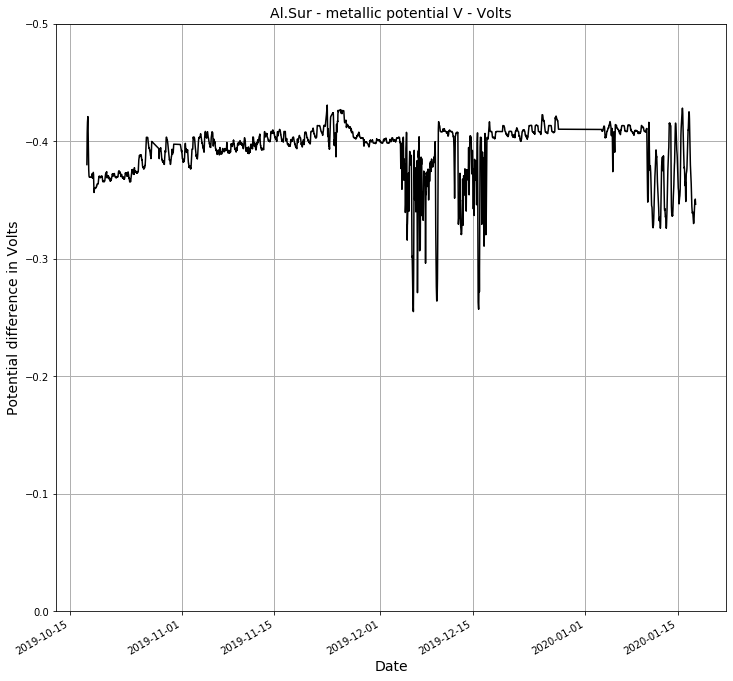

In [289]:
geraGrafico("Date", "Al.Sur - metallic potential V - Volts",Solucao4Filtrada, 0, len(Solucao4Filtrada), 0, -0.5, 10, 'black')

### Dias de captura dos dados